In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
# Importing Classifier Modules
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from lightgbm import LGBMClassifier
#Metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import chi2

In [2]:
sys.path.append('C:\\Users\\Daniel Ji\\OneDrive\\Documents\\Python Files')
import methods

In [3]:
data = pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv')
data

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [4]:
data.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [5]:
category_cols = ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education','Income']
cat_all = category_cols.copy()

<AxesSubplot: >

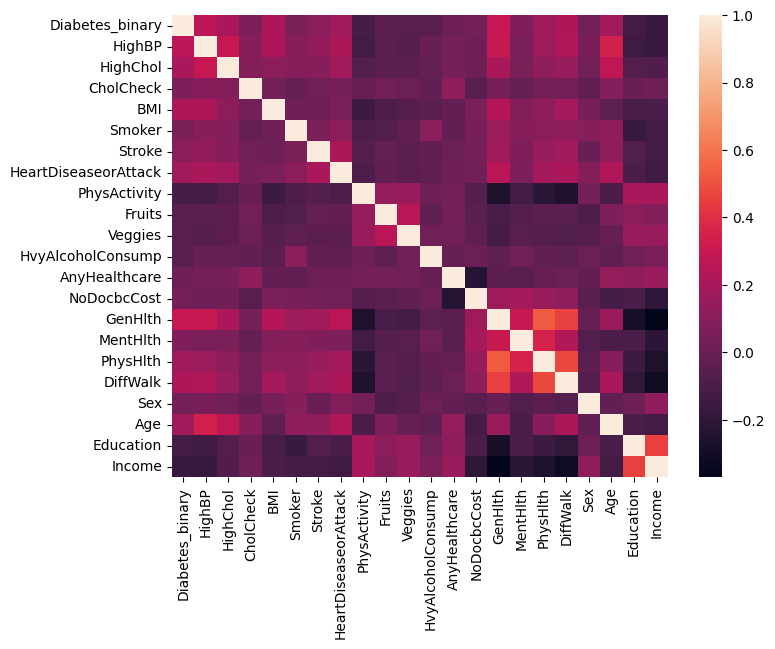

In [6]:
variables = pd.DataFrame(data.iloc[:,:])
plt.figure(figsize=(8,6))
sns.heatmap(variables.corr())

## Train-Test Split

In [7]:
#ID_col = null
target = 'Diabetes_binary'
train, test = train_test_split(data, random_state=22)

X_train = train.drop(columns=[target]).copy()
X_test = test.drop(columns=[target]).copy()

y_train = train['Diabetes_binary'].copy()
y_test = test['Diabetes_binary'].copy()

## Feature Engineering

In [8]:
chi2(X_train, y_train)
chi2_p = chi2(X_train, y_train)[1]

chi2_select_cols = []

for pValue, colname in zip(chi2_p, cat_all):
    if pValue < 0.01:
        chi2_select_cols.append(colname)

print(len(chi2_select_cols))
chi2_select_cols

selected_category_cols = [ 'Smoker',
       'Stroke', 'HeartDiseaseorAttack','PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump','Sex', 'Age']

20


In [9]:
CrossComb_train, CrossComb_test, colNames_new = methods.Binary_Cross_Combination(selected_category_cols, X_train, X_test)
CrossComb_train

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold()
sel.fit(CrossComb_train)
CrossComb_cols = CrossComb_train.columns[sel.variances_ > 0.0099]
CrossComb_cols

In [ ]:
from sklearn.feature_selection import chi2
chi2(CrossComb_train[CrossComb_cols], y_train)
chi2_p = chi2(CrossComb_train[CrossComb_cols], y_train)[1]

chi2_CrossComb_cols = []

for pValue, colname in zip(chi2_p, CrossComb_cols):
    if pValue < 0.01:
        chi2_CrossComb_cols.append(colname)

print(len(chi2_CrossComb_cols))

In [ ]:
# CrossComb_train[chi2_CrossComb_cols]
# CrossComb_test[chi2_CrossComb_cols]

In [ ]:
train_X = CrossComb_train[chi2_CrossComb_cols]
train_y = y_train
test_X = CrossComb_test[chi2_CrossComb_cols]
test_y = y_test
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier()
lgbm.fit(train_X,train_y)
y_pred_xgb = lgbm.predict(test_X)
acc_lgbm = round(lgbm.score(test_X,test_y)*100,2)
print('Light GBM:',str(acc_lgbm)+'%')

In [ ]:
lgbm.fit(train_X,train_y)
y_pred_train = lgbm.predict(train_X)
acc_train = accuracy_score(train_y,y_pred_train)
print("Train accuracy: {:.2f}".format(acc_train))

y_pred_lgbm = lgbm.predict(test_X)
acc_rf = accuracy_score(test_y,y_pred_lgbm)
print("Test set accuracy: {:.2f}".format(acc_rf))

acc_CV = cross_val_score(lgbm,train_X,train_y,cv = 2,scoring = 'accuracy',n_jobs=-1)
acc_CV = acc_CV.mean()
print('CV accuracy: {:.2f}'.format(acc_CV))

In [ ]:
filename = 'Light_GBM_model.sav'
pickle.dump(lgbm, open(filename, 'wb'))

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Create a pd.Series of features importances
importances_rf = pd.Series(lgbm.feature_importances_,
index = CrossComb_train[chi2_CrossComb_cols].columns)
# Sort importances_rf
sorted_importances_rf = importances_rf.sort_values(ascending=True)
# Make a horizontal bar plot
sorted_importances_rf[-10:-1].plot(kind='barh', color='blue')
plt.show()

In [ ]:
lgbm.feature_name_